In [1]:
import pandas as pd
import numpy as np

data = pd.DataFrame(np.random.rand(100,2)*100, columns=['first_operand', 'second_operand'])
data['output'] = data['first_operand'] * data['second_operand']
data


,first_operand,second_operand,output
0,27.648298,48.061075,1328.806903
1,5.359169,8.383043,44.926145
2,48.441236,8.132520,393.949304
3,61.356805,26.738168,1640.568561
4,66.694216,43.811058,2921.944170
...,...,...,...
95,63.750492,84.107808,5361.914133
96,72.852309,88.824885,6471.097946
97,55.576786,37.070950,2060.284266
98,70.363964,37.880709,2665.436870


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ed2ee80>,
      dtype=object)

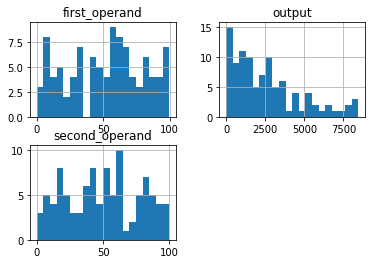

In [2]:
import matplotlib.pyplot as plt
data.hist(bins=20)

In [3]:
from sklearn.model_selection import train_test_split
y = data['output']
x = data.drop(columns='output')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [4]:
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    return mae, rmse

In [5]:
median_pred = y_train.median()
median_preds = [median_pred for _ in range(len(y_test))]
true = y_test
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print(mb_mae)
print(mb_rmse)

1464.0035379615122
1820.823386665315


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


model = LinearRegression()
model.fit(x_train, y_train)
b = model.intercept_
print('intercept: ' , b)

m = model.coef_
print('coefficients: ' , m)

y_predicted = model.predict(x_test)

mae = np.mean(abs(y_predicted - y_test))
rmse = np.sqrt(np.mean((y_predicted - y_test) ** 2))

print('median mae: ', mb_mae)
print('median rmse: ',mb_rmse)

print('mae: ', mae)
print('rmse: ', rmse)

test = pd.DataFrame([64, 0.1]).T
print(test)
res = model.predict(test)
print(res)

intercept:  -2614.8289357272033
coefficients:  [50.46205543 51.89881688]
median mae:  1464.0035379615122
median rmse:  1820.823386665315
mae:  472.0223602858101
rmse:  609.8177706914
      0    1
0  64.0  0.1
[619.93249324]
